In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sb
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
# Reading the data set that has been downloaded from Kaggle.com
df  = pd.read_csv("C:/Leena Study/NLP/finalproject/NYDB/fake.csv")

In [5]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12999 entries, 0 to 12998
Data columns (total 20 columns):
uuid                  12999 non-null object
ord_in_thread         12999 non-null int64
author                10575 non-null object
published             12999 non-null object
title                 12319 non-null object
text                  12953 non-null object
language              12999 non-null object
crawled               12999 non-null object
site_url              12999 non-null object
country               12823 non-null object
domain_rank           8776 non-null float64
thread_title          12987 non-null object
spam_score            12999 non-null float64
main_img_url          9356 non-null object
replies_count         12999 non-null int64
participants_count    12999 non-null int64
likes                 12999 non-null int64
comments              12999 non-null int64
shares                12999 non-null int64
type                  12999 non-null object
dtypes: float64(2

In [6]:
#Overview of the dataset
df.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [7]:
df.language.unique()

array(['english', 'ignore', 'german', 'french', 'spanish', 'russian',
       'greek', 'finnish', 'portuguese', 'arabic', 'dutch', 'italian',
       'turkish', 'norwegian', 'chinese', 'polish'], dtype=object)

In [8]:
# Getting only english articles
df = df[df['language'] == 'english']

In [9]:

# Pablication dates
print("Lates: ",df.published.max(),"\n\nEarliest",df.published.min())

Lates:  2016-11-25T22:17:19.691+02:00 

Earliest 2016-10-26T00:01:00.000+03:00


In [10]:
US_corpus = df.text.values

In [11]:
df.shape

(12403, 20)

In [12]:
# Replacing empty articles with "Dummy_text and Dummy_Title"
wrong_text = []
wrong_title = []
for idx, item in enumerate(df.text):
    
    try:
        df.text[idx] = re.sub('[^\x00-\x7F]+', "", item)
    except:
        df.text[idx] = 'Dummy_Text'
        wrong_text.append((idx,item))
    
    if idx%500 == 0:
        print('Here is the ',idx,'th item')
        
        
for idx,item in enumerate(df.title):
    
    try:
        df.title[idx] = re.sub('[^\x00-\x7F]+', "", item)
    except:
        df.title[idx] = 'Dummy_Title'
        wrong_title.append((idx,item))
    if idx%500 == 0:
        print('Here is the ',idx,'th item')

Here is the  0 th item


C:\Users\VISHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  5000 th item
Here is the  5500 th item
Here is the  6000 th item
Here is the  6500 th item
Here is the  7000 th item
Here is the  7500 th item
Here is the  8000 th item
Here is the  8500 th item
Here is the  9000 th item
Here is the  9500 th item
Here is the  10000 th item
Here is the  10500 th item
Here is the  11000 th item
Here is the  11500 th item
Here is the  12000 th item
Here is the  0 th item

C:\Users\VISHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\VISHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  5000 th item
Here is the  5500 th item
Here is the  6000 th item
Here is the  6500 th item
Here is the  7000 th item
Here is the  7500 th item
Here is the  8000 th item
Here is the  8500 th item
Here is the  9000 th item
Here is the  9500 th item
Here is the  10000 th item
Here is the  10500 th item
Here is the  11000 th item
Here is the  11500 th item
Here is the  12000 th item


In [13]:
slash_text = []
slash_title = []
for idx, item in enumerate(df.text):
    
    try:
        df.text[idx] = re.sub('(\\n)',"",item)
    except:
        df.text[idx] = 'Dummy_Text'
        wrong_text.append((idx,item))
    
    if idx%500 == 0:
        print('Here is the ',idx,'th item')
        
        
for idx, item in enumerate(df.title):
    
    try:
        df.title[idx] = re.sub('(\\n)',"",item)

    except:
        df.title[idx] = 'Dummy_Title'
        wrong_title.append((idx,item))
    if idx%500 == 0:
        print('Here is the ',idx,'th item')

Here is the  0 th item
Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  5000 th item
Here is the  5500 th item
Here is the  6000 th item
Here is the  6500 th item
Here is the  7000 th item
Here is the  7500 th item
Here is the  8000 th item
Here is the  8500 th item
Here is the  9000 th item
Here is the  9500 th item
Here is the  10000 th item
Here is the  10500 th item
Here is the  11000 th item
Here is the  11500 th item
Here is the  12000 th item
Here is the  12500 th item
Here is the  0 th item
Here is the  500 th item
Here is the  1000 th item
Here is the  1500 th item
Here is the  2000 th item
Here is the  2500 th item
Here is the  3000 th item
Here is the  3500 th item
Here is the  4000 th item
Here is the  4500 th item
Here is the  5000 th item
Here is the  5500 th item
Here is the  6

In [14]:
# Lookin at the data to see neccesary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12403 entries, 0 to 12998
Data columns (total 20 columns):
uuid                  12403 non-null object
ord_in_thread         12403 non-null int64
author                10194 non-null object
published             12403 non-null object
title                 12073 non-null object
text                  12357 non-null object
language              12403 non-null object
crawled               12403 non-null object
site_url              12403 non-null object
country               12227 non-null object
domain_rank           8228 non-null float64
thread_title          12391 non-null object
spam_score            12403 non-null float64
main_img_url          8779 non-null object
replies_count         12403 non-null int64
participants_count    12403 non-null int64
likes                 12403 non-null int64
comments              12403 non-null int64
shares                12403 non-null int64
type                  12403 non-null object
dtypes: float64(2

In [15]:
# Dropping Unnecassary Columns
df = df.drop(['domain_rank','main_img_url','author'],axis=1)

In [16]:
# Dropping Nan values
df.dropna(inplace=True)

In [17]:
#After Cleaning the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11841 entries, 0 to 12912
Data columns (total 17 columns):
uuid                  11841 non-null object
ord_in_thread         11841 non-null int64
published             11841 non-null object
title                 11841 non-null object
text                  11841 non-null object
language              11841 non-null object
crawled               11841 non-null object
site_url              11841 non-null object
country               11841 non-null object
thread_title          11841 non-null object
spam_score            11841 non-null float64
replies_count         11841 non-null int64
participants_count    11841 non-null int64
likes                 11841 non-null int64
comments              11841 non-null int64
shares                11841 non-null int64
type                  11841 non-null object
dtypes: float64(1), int64(6), object(10)
memory usage: 1.6+ MB


In [22]:
# Adding label to the data
df['fakeness'] = 1

In [23]:
# Saving it for the future use
df.to_csv("C:/Leena Study/NLP/finalproject/NYDB/FakeNews_Clean_All.csv")
# Importing the dataset
df = pd.read_csv("C:/Leena Study/NLP/finalproject/NYDB/FakeNews_Clean_All.csv")

In [24]:
# Double check to see if is clean 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11841 entries, 0 to 12912
Data columns (total 18 columns):
uuid                  11841 non-null object
ord_in_thread         11841 non-null int64
published             11841 non-null object
title                 11841 non-null object
text                  11841 non-null object
language              11841 non-null object
crawled               11841 non-null object
site_url              11841 non-null object
country               11841 non-null object
thread_title          11841 non-null object
spam_score            11841 non-null float64
replies_count         11841 non-null int64
participants_count    11841 non-null int64
likes                 11841 non-null int64
comments              11841 non-null int64
shares                11841 non-null int64
type                  11841 non-null object
fakeness              11841 non-null int64
dtypes: float64(1), int64(7), object(10)
memory usage: 1.7+ MB


In [25]:
df

,uuid,ord_in_thread,published,title,text,language,crawled,site_url,country,thread_title,spam_score,replies_count,participants_count,likes,comments,shares,type,fakeness
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Govt Be...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,0,1,0,0,0,bias,1
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,0,1,0,0,0,bias,1
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,0,1,0,0,0,bias,1
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,0,0,0,0,0,bias,1
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,0,0,0,0,0,bias,1
5,8f30f5ea14c9d5914a9fe4f55ab2581772af4c31,0,2016-11-02T16:31:28.550+02:00,Hillary Goes Absolutely Berserk On Protester A...,Print Hillary goes absolutely berserk! She exp...,english,2016-11-02T16:31:28.550+02:00,100percentfedup.com,US,Hillary Goes Absolutely Berserk On Protester A...,0.000,0,1,0,0,0,bias,1
6,d3cc0fe38f41a59f7c48f8c3528ca5f74193148f,0,2016-11-04T19:40:00.000+02:00,BREAKING! NYPD Ready To Make Arrests In Weiner...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T02:13:46.065+02:00,100percentfedup.com,US,BREAKING! NYPD Ready To Make Arrests In Weiner...,0.701,0,0,0,0,0,bias,1
7,b4bbf8b5c19e8864f5257832a58b81ef4ed2d4e4,0,2016-11-05T01:19:00.000+02:00,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,BREAKING! NYPD Ready To Make Arrests In Weiner...,english,2016-11-05T05:59:07.458+02:00,100percentfedup.com,US,WOW! WHISTLEBLOWER TELLS CHILLING STORY Of Mas...,0.188,0,0,0,0,0,bias,1
8,a19aabaa5a61eb8bc22fadaaa003e5fbba5c4bf6,0,2016-11-06T23:54:00.000+02:00,BREAKING: CLINTON CLEARED...Was This A Coordin...,\nLimbaugh said that the revelations in the Wi...,english,2016-11-07T10:20:06.409+02:00,100percentfedup.com,US,BREAKING: CLINTON CLEARED...Was This A Coordin...,0.144,0,0,0,0,0,bias,1
9,f54d8e13010d0a79893995ee65360ad4b38b5a35,0,2016-11-07T02:43:00.000+02:00,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""Burn ...",Email \nThese people are sick and evil. They w...,english,2016-11-07T10:20:27.252+02:00,100percentfedup.com,US,"EVIL HILLARY SUPPORTERS Yell ""F*ck Trump""…Burn...",0.995,0,0,0,0,0,bias,1


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
vectorizer = tdf.fit(df.text)
#transformed_text = vectorizer.transform(df.body)
transformed_title = vectorizer.transform(df.title)

In [42]:
def get_tfidf_term_scores(feature_names):
    '''Returns dictionary with term names and total tfidf scores for all terms in corpus'''
    term_corpus_dict = {}
    # iterate through term index and term 
    for term_ind, term in enumerate(feature_names):
        term_name = feature_names[term_ind]
        term_corpus_dict[term_name] = np.sum(transformed_title.T[term_ind].toarray())
        
    return term_corpus_dict

In [43]:
# list of features created by tfidf
feature_names = tdf.get_feature_names()

In [44]:
term_corpus_dict = get_tfidf_term_scores(feature_names)

In [45]:
print("Number of columns is: ",len(term_corpus_dict.keys()))

Number of columns is:  2201774


In [46]:
def get_sorted_tfidf_scores(term_corpus_dict):
    '''Returns sort words from highest score to lowest score'''
    # sort indices from words wit highest score to lowest score
    sortedIndices = np.argsort( list(term_corpus_dict.values()))[::-1]
    # move words and score out of dicts and into arrays
    termNames = np.array(list(term_corpus_dict.keys()))
    scores = np.array(list(term_corpus_dict.values()))
    # sort words and scores
    termNames = termNames[sortedIndices]
    scores = scores[sortedIndices]
    
    return termNames, scores

In [47]:
termNames, scores = get_sorted_tfidf_scores(term_corpus_dict)

In [48]:
def getSelectScores(selectTerms):
    '''Returns a list of tfidf scores for select terms that are passed in'''
    score = [ term_corpus_dict[select_term]  for select_term in selectTerms]
    return score

In [49]:
selectTerms = ['trump', 'clinton','islamic', 'russia' , 'women', 'obama', 'men',
               'students', 'shooting', 'democrats', 'republicans', 'climate',
               'education', 'environment', 'tech', 'minorities', 'carbon',
               'muslim','ban']

In [50]:
selectScores = getSelectScores(selectTerms)

In [51]:
def plot_tfidf_scores(scores,termNames, selectScores, selectTerms,  n_words = 18):
    '''Returns one plot for Importance of Top N Terms
       and one plot for Importance of Select K Terms'''

    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (14, 18))
    
    override = {'fontsize': 'large'}

    fig.add_subplot(221)   #top left
    n_words = 75
    sb.barplot(x = scores[:n_words], y = termNames[:n_words]);
    sb.plt.title("TFIDF - Importance of Top {0} Terms".format(n_words));
    sb.plt.xlabel("TFIDF Score");

    fig.add_subplot(222)   #top right 
    sb.barplot(x = selectScores, y = selectTerms);
    sb.plt.title("TFIDF - Importance of Select {0} Terms".format(len(selectTerms)));
    sb.plt.xlabel("TFIDF Score");
    sb.plt.ylabel(override)

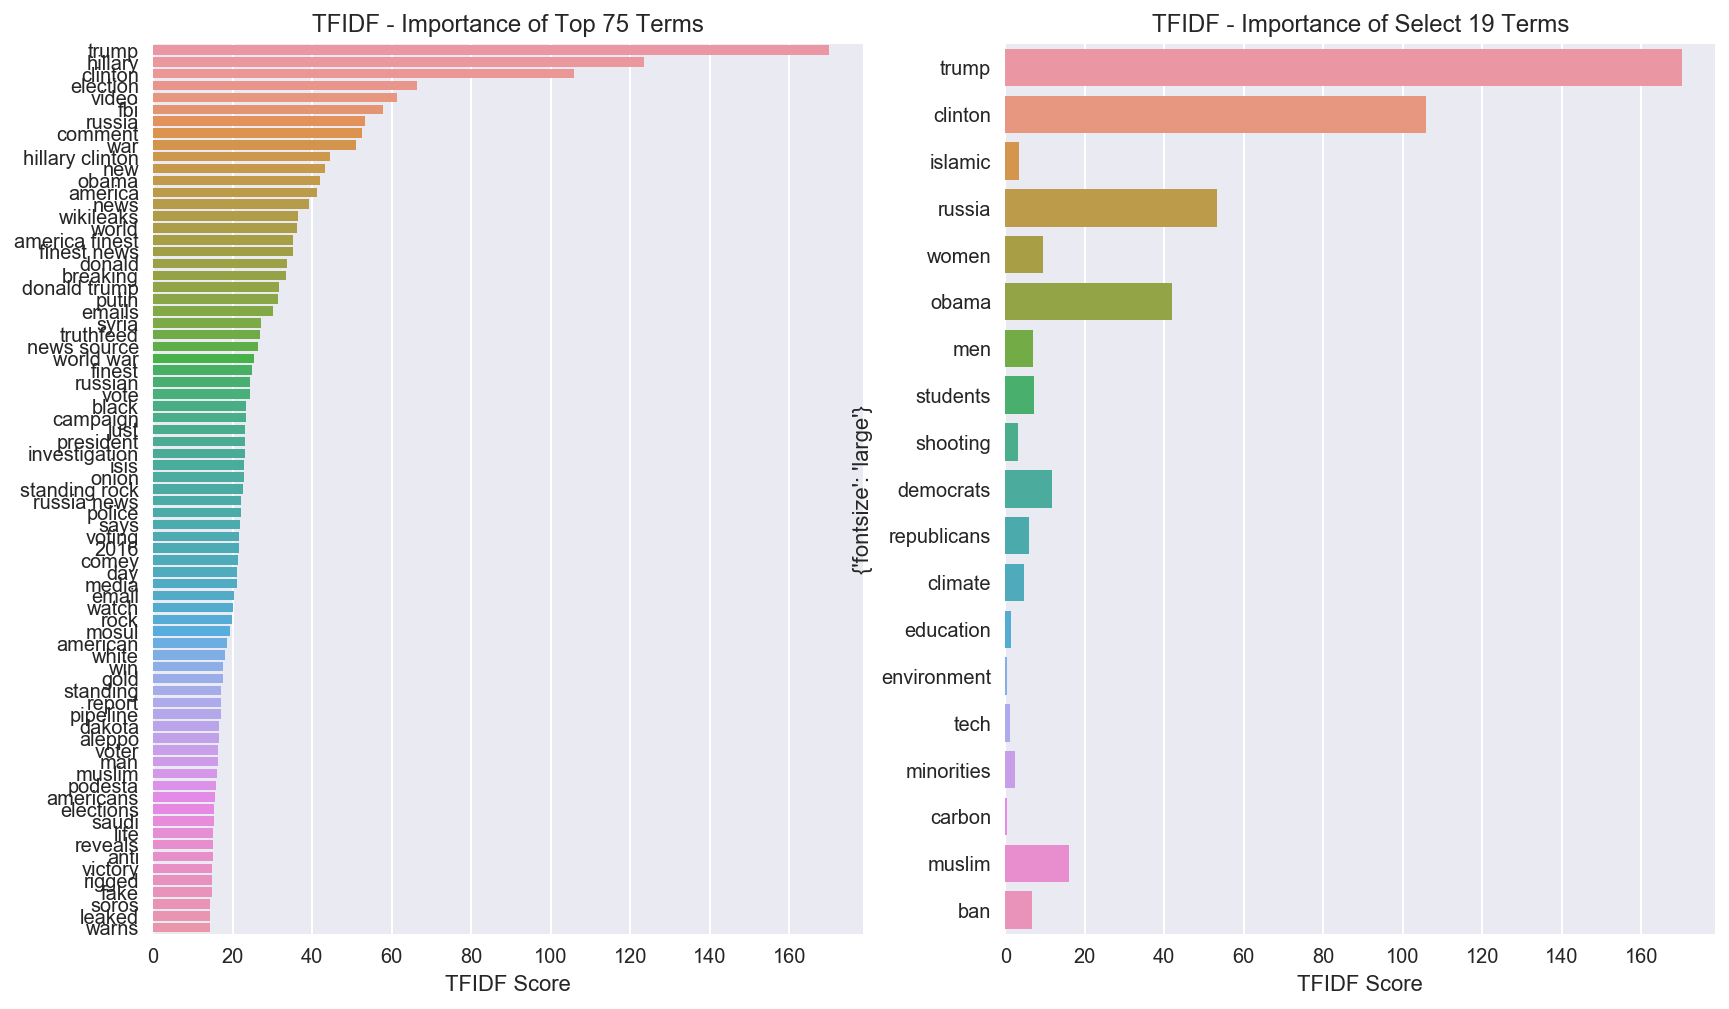

In [52]:
import matplotlib.pyplot as plt
import seaborn as sb
plot_tfidf_scores(scores, termNames, selectScores, selectTerms,  n_words = 18)